In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
headers = {
  "User-Agent":
  "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.102 Safari/537.36 Edge/18.19582"
}

In [3]:
link = 'https://www.google.com/search?source=hp&ei=_KG8X5LULNv8rQHU_SY&q=samsung+mobile&oq=samsung+mob&gs_lcp=CgZwc3ktYWIQAxgAMgUIABCxAzIFCAAQsQMyBQgAEMkDMgUIABCSAzIFCAAQkgMyAggAMgIIADIFCAAQsQMyAggAMgIIADoLCAAQsQMQgwEQyQM6CAgAELEDEIMBOgsILhCxAxDHARCjAjoFCC4QsQM6AgguOggILhCxAxCDAToICC4QxwEQowI6DgguELEDEIMBEMkDEJMCOg4ILhCxAxDHARCjAhCTAjoICAAQsQMQyQNQ7nlY5qIBYNarAWgEcAB4AIABXogBwAmSAQIxNZgBAKABAaoBB2d3cy13aXqwAQA&sclient=psy-ab'
response=requests.get(link, headers=headers)

print(response)
soup = BeautifulSoup(response.text, 'html.parser')

<Response [200]>


<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en-IN"><head><meta charset="utf-8"/><meta content="origin" name="referrer"/> <link href="/searchdomaincheck?format=opensearch" rel="search" title="Google Search" type="application/opensearchdescription+xml"/> <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>samsung mobile - Google Search</title><script nonce="DDBUwvXeEPPi8xMu0WMd7w==">(function(){window.google={kEI:'2iYSYerMB8jM1sQPw9qrwAY',kEXPI:'31',kBL:'88pG'};google.sn='web';google.kHL='en-IN';})();(function(){
var f=this||self;var h,k=[];function l(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||h}function m(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode;return b}
function n(a,b,c,d,g){var e="";c||-1!==b.search("&ei=")||(e="&ei="+l(d),-1===b.search("&lei=")&&(d=m(d))&&(e+="&lei="+d));d="";!c&&f._cshid&&-1===b.search(
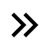
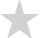
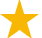
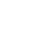
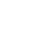
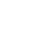
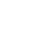
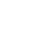
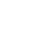
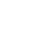
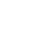
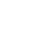
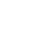
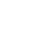
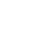
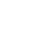
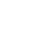
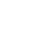
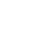
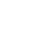
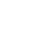
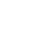
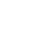
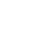
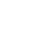
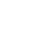
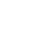
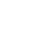
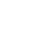
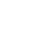
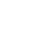
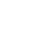
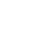
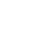
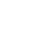
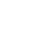
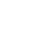
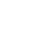
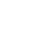
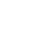
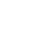
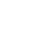
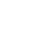
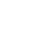
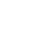
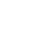
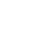
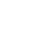
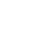
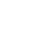
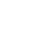
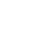
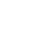
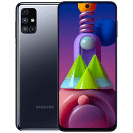
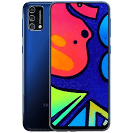
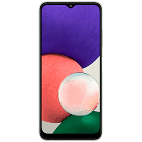
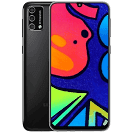
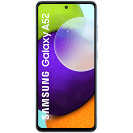
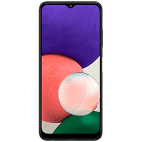
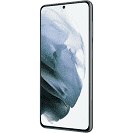
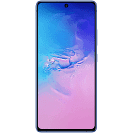
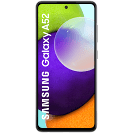
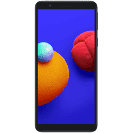
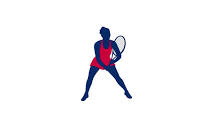

In [4]:
print(soup)

In [6]:
cards=soup.find("div",attrs={"class":"top-pla-group-inner"}) # Complete card

In [8]:
images=[]
for img in cards.find_all('img'):
    images.append(img.get('src'))

In [10]:
span = cards.find_all("span", attrs={'class':"pymv4e"})

In [66]:
l = []  # For Details of moblies
m = []
n = []

for i in range(len(span)):
    v = str(span[i])
    l.append(v[50:-7].split('|'))
    m.append(",".join(l[i]))
    n.append(m[i].split(','))
    

In [74]:
a = cards.find_all("a", attrs={'class':'plantl pla-unit-single-clickable-target clickable-card'})

In [116]:
t = []   # For prices of moblies
for i in range (len(a)):
    q = str(a[i])
    t.append(q.split('₹')[1][:6])


In [123]:
df=pd.DataFrame(n)

In [124]:
df.columns  = ['Mobile_Name','Memory_RAM','Display_Body','Camera', 'Processor', 'Battery']
df['Img_URL'] = images[:50]

In [131]:
t= pd.Series(t)
df = pd.concat([df,t],axis=1)

In [132]:
df.head(5)

,Mobile_Name,Memory_RAM,Display_Body,Camera,Processor,Battery,Img_URL,0
0,Samsung Galaxy Note20,Mystic Bronze,Infinity-o-Display,30X Super Resolution Zoom,8K Video Recording,4300mAh Battery,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","54,999"
1,Samsung Galaxy Note20,Mystic Bronze,Infinity-o-Display,30X Super Resolution Zoom,8K Video Recording,4300mAh Battery,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////...","21,999"
2,Samsung Galaxy M51 8GB RAM,Celestial Black,7,000mAh battery,Fast Qualcomm Snapdragon 730G Processor,Super AMOLED Plus technology,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...","14,499"
3,Samsung Galaxy M51 8GB RAM,Celestial Black,7,000mAh battery,Fast Qualcomm Snapdragon 730G Processor,Super AMOLED Plus technology,None,"14,999"
4,Galaxy F41 128GB,Fusion Blue,"16.21cm (6.4"") Super AMOLED Infinity U Display",64MP Versatile Triple Camera,Long Lasting Battery (6000mAh),None,None,"54,999"


In [133]:
df.shape

(50, 8)

In [134]:
df.to_csv('mobiles_list.csv', index=False)

In [135]:
# old notebook
# https://github.com/taruntiwarihp/Projects_DS/blob/master/Scraping%20Mobile%20Details%20from%20Flipkart.ipynb